In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import sys,re
import cv2 as cv

In [43]:
data_dir = '/mnt/synology01/Recursion/rxrx2/images/HUVEC-1/Plate1/'
files = sorted([f for f in os.listdir(data_dir) if re.search('O24_s2',f) is not None])

img_dict = {}
for i in range(len(files)):
    ch_img = cv.imread(os.path.join(data_dir,files[i]),cv.IMREAD_UNCHANGED)
    for j in range(15):
        ch_img = cv.GaussianBlur(ch_img, (31,31), 0)
    img_dict.update({f'w{i+1}':ch_img})

print(img_dict)

{'w1': array([[1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8), 'w2': array([[15, 15, 15, ..., 16, 16, 16],
       [15, 15, 15, ..., 16, 16, 16],
       [15, 15, 15, ..., 16, 16, 16],
       ...,
       [18, 18, 18, ..., 13, 13, 13],
       [18, 18, 18, ..., 13, 13, 13],
       [18, 18, 18, ..., 13, 13, 13]], dtype=uint8), 'w3': array([[10, 10, 10, ...,  9,  9,  9],
       [10, 10, 10, ...,  9,  9,  9],
       [10, 10, 10, ...,  9,  9,  9],
       ...,
       [ 9,  9,  9, ...,  8,  8,  8],
       [ 9,  9,  9, ...,  8,  8,  8],
       [ 9,  9,  9, ...,  8,  8,  8]], dtype=uint8), 'w4': array([[ 9,  9,  9, ..., 10, 10, 10],
       [ 9,  9,  9, ..., 10, 10, 10],
       [ 9,  9,  9, ..., 10, 10, 10],
       ...,
       [ 9,  9,  9, ...,  7,  7,  7],
       [ 9,  9,  9, ...,  7,  7,  7],
       [ 9,  9,  9, ...,  7,  7,  7]], dtype

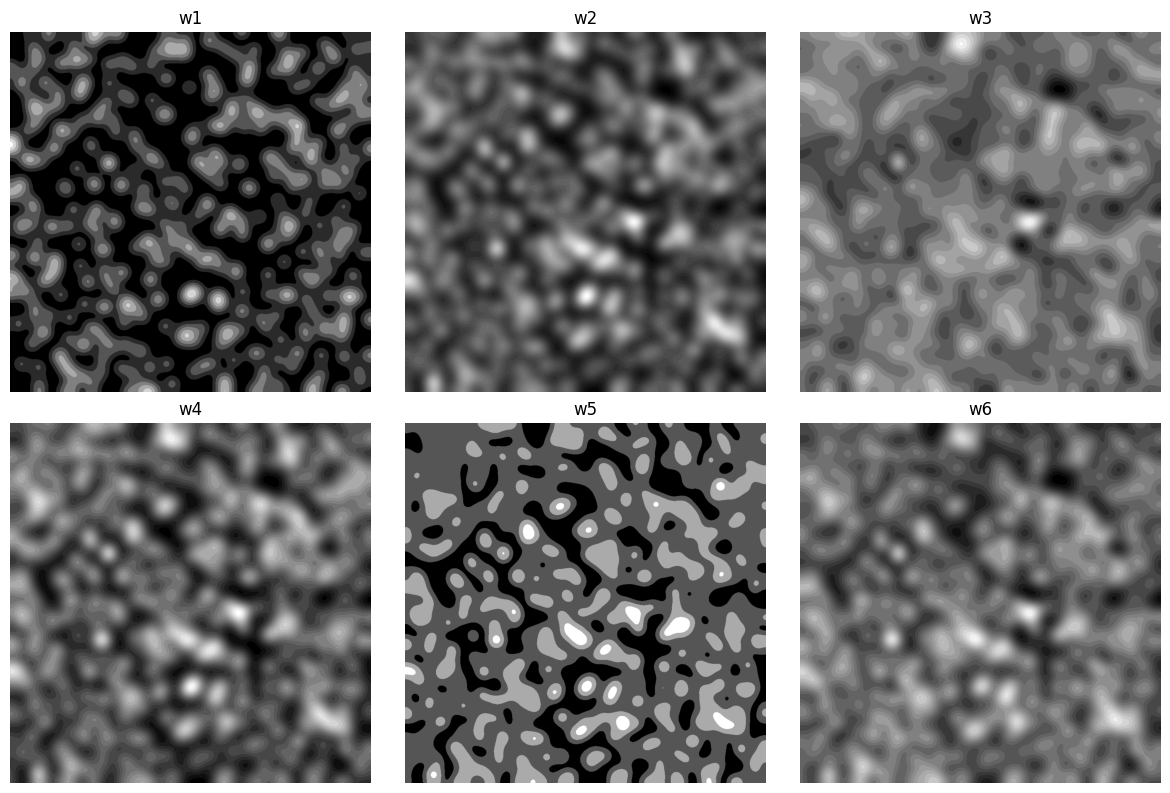

In [44]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(12,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(img_dict[f'w{i+1}'],cmap='gray')
    ax.axis('off')
    ax.set_title(f'w{i+1}')
fig.tight_layout()

In [42]:
save_dir = '/home/jeffdatasci/Documents/submodules/Quality_control_HCI/tests/test_imgs/'
np.save(os.path.join(save_dir,'rxrx2_O24_s2_OOF.npy'),img_dict,allow_pickle=True)